## Import Libraries for working on given dataset

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
loan = pd.read_csv('loan.csv')

c:\Users\Raghava\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### As given which having 111 column with 39717 rows of data

In [4]:
loan.shape

(39717, 111)

## Data Cleaning Process 

### As in the given dataset we have check first missing value and there impotance to analysis

In [5]:
missing_val = (loan.isnull().sum()/loan.shape[0])*100

In [6]:
missing_val

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

### Lets create dataframe to show missing value with there percentage value

In [7]:
missing_val_df = pd.DataFrame({
    'Column':loan.columns,
    'Missing_Count':loan.isnull().sum(),
    'Missing_Percentage':(loan.isnull().sum()/loan.shape[0])*100
})

In [8]:
missing_val_df.head()

Column  Missing_Count  Missing_Percentage
id                            id              0                 0.0
member_id              member_id              0                 0.0
loan_amnt              loan_amnt              0                 0.0
funded_amnt          funded_amnt              0                 0.0
funded_amnt_inv  funded_amnt_inv              0                 0.0

In [9]:
missing_val_df.tail()

Column  Missing_Count  \
tax_liens                                    tax_liens             39   
tot_hi_cred_lim                        tot_hi_cred_lim          39717   
total_bal_ex_mort                    total_bal_ex_mort          39717   
total_bc_limit                          total_bc_limit          39717   
total_il_high_credit_limit  total_il_high_credit_limit          39717   

                            Missing_Percentage  
tax_liens                             0.098195  
tot_hi_cred_lim                     100.000000  
total_bal_ex_mort                   100.000000  
total_bc_limit                      100.000000  
total_il_high_credit_limit          100.000000

### As per given dataset there is many which having missing percentage between.
### So lets take percentage of threshold between 30% to 100%.
### lets drop columns having missing value in this range we can drop this column as missing value to large for which we cannot impute the data

In [10]:
missing_val_df[(missing_val_df['Missing_Percentage']>=30)&(missing_val_df['Missing_Percentage']<=100)]

Column  Missing_Count  \
desc                                                      desc          12940   
mths_since_last_delinq                  mths_since_last_delinq          25682   
mths_since_last_record                  mths_since_last_record          36931   
next_pymnt_d                                      next_pymnt_d          38577   
mths_since_last_major_derog        mths_since_last_major_derog          39717   
annual_inc_joint                              annual_inc_joint          39717   
dti_joint                                            dti_joint          39717   
verification_status_joint            verification_status_joint          39717   
tot_coll_amt                                      tot_coll_amt          39717   
tot_cur_bal                                        tot_cur_bal          39717   
open_acc_6m                                        open_acc_6m          39717   
open_il_6m                                          open_il_6m          39717   
open_il_12m                                        open_il_12m          39717   
open_il_24m                                        open_il_24m          39717   
mths_since_rcnt_il                          mths_since_rcnt_il          39717   
total_bal_il                                      total_bal_il          39717   
il_util                                                il_util          39717   
open_rv_12m                                        open_rv_12m          39717   
open_rv_24m                                        open_rv_24m          39717   
max_bal_bc                                          max_bal_bc          39717   
all_util                                              all_util          39717   
total_rev_hi_lim                              total_rev_hi_lim          39717   
inq_fi                                                  inq_fi          39717   
total_cu_tl                                        total_cu_tl          39717   
inq_last_12m                                      inq_last_12m          39717   
acc_open_past_24mths                      acc_open_past_24mths          39717   
avg_cur_bal                                        avg_cur_bal          39717   
bc_open_to_buy                                  bc_open_to_buy          39717   
bc_util                                                bc_util          39717   
mo_sin_old_il_acct                          mo_sin_old_il_acct          39717   
mo_sin_old_rev_tl_op                      mo_sin_old_rev_tl_op          39717   
mo_sin_rcnt_rev_tl_op                    mo_sin_rcnt_rev_tl_op          39717   
mo_sin_rcnt_tl                                  mo_sin_rcnt_tl          39717   
mort_acc                                              mort_acc          39717   
mths_since_recent_bc                      mths_since_recent_bc          39717   
mths_since_recent_bc_dlq              mths_since_recent_bc_dlq          39717   
mths_since_recent_inq                    mths_since_recent_inq          39717   
mths_since_recent_revol_delinq  mths_since_recent_revol_delinq          39717   
num_accts_ever_120_pd                    num_accts_ever_120_pd          39717   
num_actv_bc_tl                                  num_actv_bc_tl          39717   
num_actv_rev_tl                                num_actv_rev_tl          39717   
num_bc_sats                                        num_bc_sats          39717   
num_bc_tl                                            num_bc_tl          39717   
num_il_tl                                            num_il_tl          39717   
num_op_rev_tl                                    num_op_rev_tl          39717   
num_rev_accts                                    num_rev_accts          39717   
num_rev_tl_bal_gt_0                        num_rev_tl_bal_gt_0          39717   
num_sats                                              num_sats          39717   
num_tl_120dpd_2m                              num_tl_120dpd_2m          39717   
num_tl

### Lets drop this data from loan dataset

In [11]:
loan.drop(missing_val_df[(missing_val_df['Missing_Percentage']>=30)&(missing_val_df['Missing_Percentage']<=100)].index, axis=1,inplace=True)

### Now we deleted the column having missing value from 30% to 100%.
### We have left with column 53.

In [12]:
loan.shape

(39717, 53)

### drop the rows which having missing percentage between 30% to 100%

In [13]:
missing_val_df.drop(missing_val_df[(missing_val_df['Missing_Percentage']>=30)&(missing_val_df['Missing_Percentage']<=100)].index,axis=0,inplace=True)

### Lets work on column having missing value more then 0

In [14]:
missing_val_df[missing_val_df['Missing_Percentage']>0]

Column  Missing_Count  \
emp_title                                    emp_title           2459   
emp_length                                  emp_length           1075   
title                                            title             11   
revol_util                                  revol_util             50   
last_pymnt_d                              last_pymnt_d             71   
last_credit_pull_d                  last_credit_pull_d              2   
collections_12_mths_ex_med  collections_12_mths_ex_med             56   
chargeoff_within_12_mths      chargeoff_within_12_mths             56   
pub_rec_bankruptcies              pub_rec_bankruptcies            697   
tax_liens                                    tax_liens             39   

                            Missing_Percentage  
emp_title                             6.191303  
emp_length                            2.706650  
title                                 0.027696  
revol_util                            0.125891  
last_pymnt_d                          0.178765  
last_credit_pull_d                    0.005036  
collections_12_mths_ex_med            0.140998  
chargeoff_within_12_mths              0.140998  
pub_rec_bankruptcies                  1.754916  
tax_liens                             0.098195

### Lets work on each column index one by one

### Column Index 'emp_title'

In [15]:
loan['emp_title'].value_counts()

US Army                                134
Bank of America                        109
IBM                                     66
AT&T                                    59
Kaiser Permanente                       56
                                      ... 
mercuru insurance                        1
Trinity (rusty mug inc) formerly JR      1
gross communications                     1
Ventana Medical Systems                  1
us post office                           1
Name: emp_title, Length: 28820, dtype: int64

In [16]:
loan['emp_title'].nunique()

28820

### So as given emp_title has 28820 unique title which lead to no information analysis. 
### lets drop the given column

In [17]:
loan.drop(['emp_title'],axis=1,inplace=True)

### Column Index 'emp_length'

In [18]:
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [19]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

### As given column is important for our analysis lets impute it.
### As it is employment of customer, so we can fill null value with 'self_employee' 

In [20]:
loan['emp_length'] = loan['emp_length'].fillna('self_emp')

In [21]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'self_emp'],
      dtype=object)

In [22]:
### Check missing value
loan['emp_length'].isnull().sum()

0

### Column Index title

In [23]:
loan['title'].value_counts()

Debt Consolidation                       2184
Debt Consolidation Loan                  1729
Personal Loan                             659
Consolidation                             517
debt consolidation                        505
                                         ... 
Loan for Bills                              1
Adjustment loan                             1
Luisa's Debt Consolidation Loan             1
New location to Tempe                       1
Pay off all my debts with one payment       1
Name: title, Length: 19615, dtype: int64

In [24]:
loan['title'].nunique()

19615

### As given title column not giving any analysis so we can drop it.

In [25]:
loan.drop(['title'],axis=1,inplace=True)

### lets see how many column have missing value

In [26]:
missing_val_df[missing_val_df['Missing_Percentage']>0]

Column  Missing_Count  \
emp_title                                    emp_title           2459   
emp_length                                  emp_length           1075   
title                                            title             11   
revol_util                                  revol_util             50   
last_pymnt_d                              last_pymnt_d             71   
last_credit_pull_d                  last_credit_pull_d              2   
collections_12_mths_ex_med  collections_12_mths_ex_med             56   
chargeoff_within_12_mths      chargeoff_within_12_mths             56   
pub_rec_bankruptcies              pub_rec_bankruptcies            697   
tax_liens                                    tax_liens             39   

                            Missing_Percentage  
emp_title                             6.191303  
emp_length                            2.706650  
title                                 0.027696  
revol_util                            0.125891  
last_pymnt_d                          0.178765  
last_credit_pull_d                    0.005036  
collections_12_mths_ex_med            0.140998  
chargeoff_within_12_mths              0.140998  
pub_rec_bankruptcies                  1.754916  
tax_liens                             0.098195

### Lets remove the column having unique value 1 

In [27]:
loan_unique = loan.copy()
unique_value = loan_unique.nunique()
col_value_unique = unique_value[unique_value.values == 1]
col_value_unique_name = col_value_unique.index.to_list()
loan.drop(col_value_unique_name, axis=1,inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

So now we are left with (39717, 42) rows & columns.


### Lets use buisness understanding to come on the result of which column is nessacary which not.

### lets take use of Data Dictionary

In [28]:
data_dict = pd.read_excel('Data_Dictionary.xlsx',engine='openpyxl')

In [29]:
data_dict

LoanStatNew                                        Description  \
0           acc_now_delinq  The number of accounts on which the borrower i...   
1     acc_open_past_24mths         Number of trades opened in past 24 months.   
2               addr_state  The state provided by the borrower in the loan...   
3                 all_util              Balance to credit limit on all trades   
4               annual_inc  The self-reported annual income provided by th...   
..                     ...                                                ...   
112    verification_status  Indicates if income was verified by LC, not ve...   
113  verified_status_joint  Indicates if the co-borrowers' joint income wa...   
114               zip_code  The first 3 numbers of the zip code provided b...   
115                    NaN                                                NaN   
116                    NaN  * Employer Title replaces Employer Name for al...   

     Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  \
0           NaN         NaN         NaN         NaN         NaN         NaN   
1           NaN         NaN         NaN         NaN         NaN         NaN   
2           NaN         NaN         NaN         NaN         NaN         NaN   
3           NaN         NaN         NaN         NaN         NaN         NaN   
4           NaN         NaN         NaN         NaN         NaN         NaN   
..          ...         ...         ...         ...         ...         ...   
112         NaN         NaN         NaN         NaN         NaN         NaN   
113         NaN         NaN         NaN         NaN         NaN         NaN   
114         NaN         NaN         NaN         NaN         NaN         NaN   
115         NaN         NaN         NaN         NaN         NaN         NaN   
116         NaN         NaN         NaN         NaN         NaN         NaN   

     Unnamed: 8  Unnamed: 9  Unnamed: 10  
0           NaN         NaN          NaN  
1           NaN         NaN          NaN  
2           NaN         NaN          NaN  
3           NaN         NaN          NaN  
4           NaN         NaN          NaN  
..          ...         ...          ...  
112         NaN         NaN          NaN  
113         NaN         NaN          NaN  
114         NaN         NaN          NaN  
115         NaN         NaN          NaN  
116         NaN         NaN          NaN  

[117 rows x 11 columns]

In [30]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_pymnt_inv total_rec_prncp  \
0   10.65%       162.87     B        B2  ...         5833.84         5000.00   
1   15.27%        59.83     C        C4  ...         1008.71          456.46   
2   15.96%        84.33     C        C5  ...         3005.67         2400.00   
3   13.49%       339.31     C        C1  ...        12231.89        10000.00   
4   12.69%        67.79     B        B5  ...         3513.33         2475.94   

   total_rec_int total_rec_late_fee recoveries collection_recovery_fee  \
0         863.16               0.00       0.00                    0.00   
1         435.17               0.00     117.08                    1.11   
2         605.67               0.00       0.00                    0.00   
3        2214.92              16.97       0.00                    0.00   
4        1037.39               0.00       0.00                    0.00   

  last_pymnt_d last_pymnt_amnt last_credit_pull_d pub_rec_bankruptcies  
0       Jan-15          171.62             May-16                  0.0  
1       Apr-13          119.66             Sep-13                  0.0  
2       Jun-14          649.91             May-16                  0.0  
3       Jan-15          357.48             Apr-16                  0.0  
4       May-16           67.79             May-16                  0.0  

[5 rows x 42 columns]

In [31]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               39717 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

### As given column " id, member_id, pub_rec_bankruptcies, zip_code, url" not required , so we can drop it.

In [32]:
loan.drop(['id','member_id','pub_rec_bankruptcies','zip_code','url'],axis=1,inplace=True)

In [33]:
loan.shape

(39717, 37)

In [34]:
loan.isnull().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 50
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection

### Now we left with 3 column missing value.
### it contain less missing value we can drop that row

In [35]:
loan.dropna(inplace=True)

In [36]:
loan.shape

(39598, 37)

In [37]:
loan.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d  

### Now we have work with missing value treatment.
### lets work on data type conversion 

In [38]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39598 non-null  int64  
 1   funded_amnt              39598 non-null  int64  
 2   funded_amnt_inv          39598 non-null  float64
 3   term                     39598 non-null  object 
 4   int_rate                 39598 non-null  object 
 5   installment              39598 non-null  float64
 6   grade                    39598 non-null  object 
 7   sub_grade                39598 non-null  object 
 8   emp_length               39598 non-null  object 
 9   home_ownership           39598 non-null  object 
 10  annual_inc               39598 non-null  float64
 11  verification_status      39598 non-null  object 
 12  issue_d                  39598 non-null  object 
 13  loan_status              39598 non-null  object 
 14  purpose               

In [39]:
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade emp_length home_ownership  ...   total_pymnt  \
0     B        B2  10+ years           RENT  ...   5863.155187   
1     C        C4   < 1 year           RENT  ...   1008.710000   
2     C        C5  10+ years           RENT  ...   3005.666844   
3     C        C1  10+ years           RENT  ...  12231.890000   
4     B        B5     1 year           RENT  ...   3513.330000   

  total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries  \
0         5833.84         5000.00        863.16               0.00       0.00   
1         1008.71          456.46        435.17               0.00     117.08   
2         3005.67         2400.00        605.67               0.00       0.00   
3        12231.89        10000.00       2214.92              16.97       0.00   
4         3513.33         2475.94       1037.39               0.00       0.00   

   collection_recovery_fee  last_pymnt_d last_pymnt_amnt  last_credit_pull_d  
0                     0.00        Jan-15          171.62              May-16  
1                     1.11        Apr-13          119.66              Sep-13  
2                     0.00        Jun-14          649.91              May-16  
3                     0.00        Jan-15          357.48              Apr-16  
4                     0.00        May-16           67.79              May-16  

[5 rows x 37 columns]

### As we can see there are more % in given dataset 

In [40]:
percentage_cols = ['int_rate','revol_util']
for each in percentage_cols:
    loan[each] = loan[each].apply(lambda x: float(str(x).replace('%','')) if not pd.isna(x) else  x)

In [41]:
loan.shape

(39598, 37)

In [42]:
%%markdown

## Lets dervie some columns from the loan data like month, year, loan income ratio, defaulters


## Lets dervie some columns from the loan data like month, year, loan income ratio, defaulters


In [43]:
loan['issue_mnth'],loan['issue_year'] = loan['issue_d'].str.split('-').str
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']
loan['Defaulters'] =loan['loan_status'].apply(lambda x:1 if x == 'Fully Paid' else 0).astype(int)
loan.shape

c:\Users\Raghava\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


(39598, 41)

In [44]:
%%markdown
## Now let's find out of if there are any outliers in the data for continous varibales
### Lets find out what columns are continous and categorical accordingly
#### Based on our requirement we need to check with few columns whether they have outliers or not



## Now let's find out of if there are any outliers in the data for continous varibales
### Lets find out what columns are continous and categorical accordingly
#### Based on our requirement we need to check with few columns whether they have outliers or not



In [45]:
# Continous Varibales
(loan.describe().columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'loan_income_ratio',
       'Defaulters'],
      dtype='object')

In [46]:
def outlier_detect(col):
    outlier_q3 = loan[col].quantile(0.75)
    outlier_q1  = loan[col].quantile(0.25)
    IQR = outlier_q3 - outlier_q1
    shape_of_outliers = loan[loan[col] >= outlier_q3 + (1.5 * IQR)].shape
    print("Shape of the outlier for {} is ".format(col),shape_of_outliers)
    return outlier_q3 + (1.5 * IQR)

In [47]:
def boxPlot(col):
    print(loan[col].describe().apply(lambda x: format(x, 'f')))
    sns.boxplot(x=loan[col])
    # outlier_detect(col)

count    39598.000000
mean     11232.584979
std       7455.138187
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: object


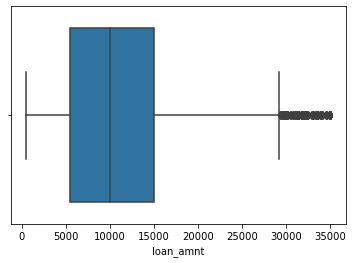

In [48]:
boxPlot('loan_amnt')

count    39598.000000
mean        12.013703
std          3.724028
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: object


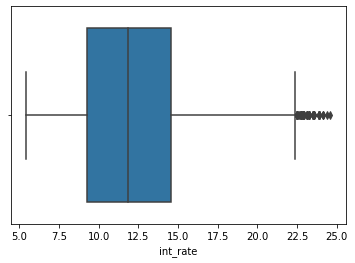

In [49]:
boxPlot('int_rate')

count      39598.000000
mean       69035.084901
std        63828.578419
min         4000.000000
25%        40632.500000
50%        59000.000000
75%        82500.000000
max      6000000.000000
Name: annual_inc, dtype: object


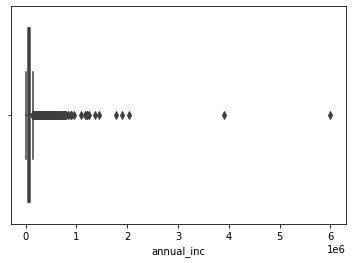

In [50]:
boxPlot('annual_inc')

In [51]:
%%markdown
## As we can see there are outliers which may effect the data will be removing the outliers

## As we can see there are outliers which may effect the data will be removing the outliers


In [52]:
loan.shape

(39598, 41)

In [53]:
loan = loan[loan['loan_amnt'] <= outlier_detect('loan_amnt')]
loan = loan[loan['int_rate']<= outlier_detect('int_rate')]
loan = loan[loan['annual_inc']<= outlier_detect('annual_inc')]
loan.shape


Shape of the outlier for loan_amnt is  (1228, 41)
Shape of the outlier for int_rate is  (76, 41)
Shape of the outlier for annual_inc is  (1856, 41)


(36592, 41)

In [54]:
#categorical variables
list(set(loan.columns)- set(loan.describe().columns))

['issue_year',
 'last_pymnt_d',
 'sub_grade',
 'term',
 'loan_status',
 'emp_length',
 'last_credit_pull_d',
 'issue_d',
 'grade',
 'purpose',
 'verification_status',
 'home_ownership',
 'earliest_cr_line',
 'issue_mnth',
 'addr_state']

In [55]:
%%markdown
### Following are important features/columns emp_length, home_ownership, verification_status, loan_status, purpose, year

### Following are important features/columns emp_length, home_ownership, verification_status, loan_status, purpose, year


In [97]:
## Outlier Detection for categorical features
cat_vars = ['emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'issue_year','term']

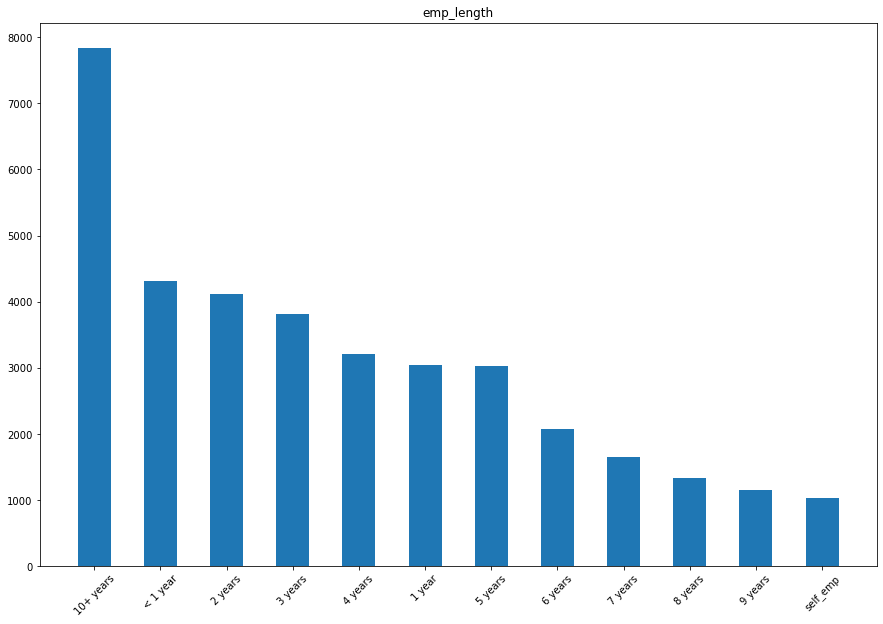

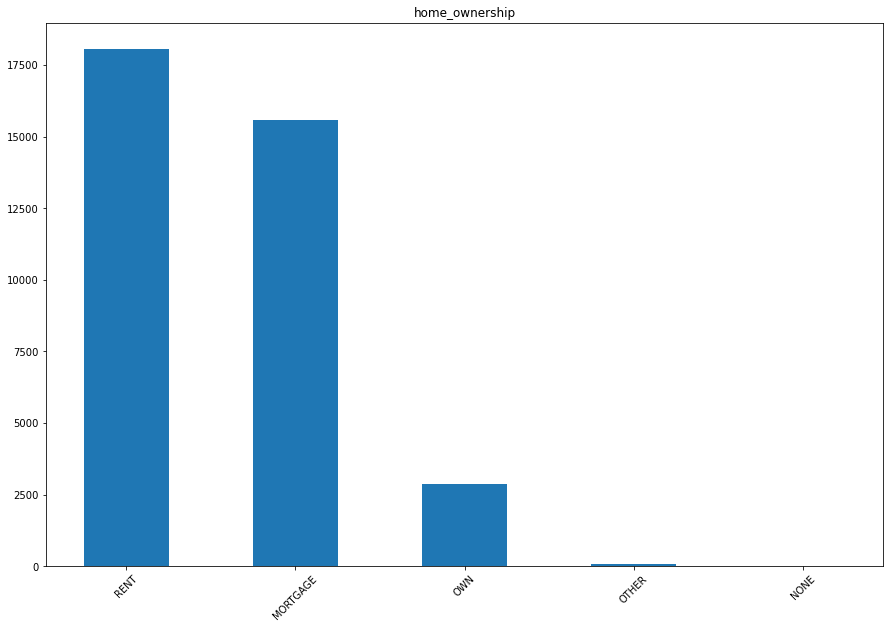

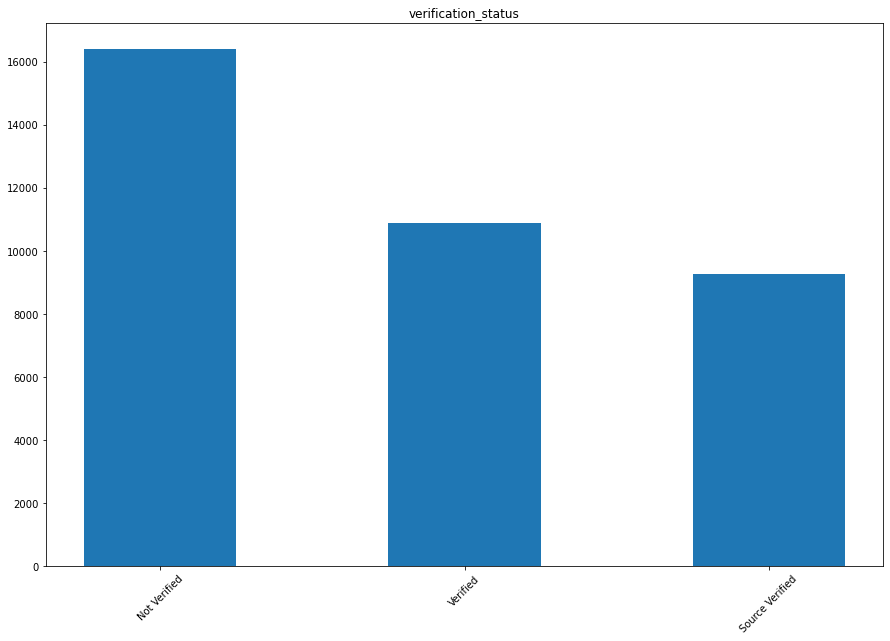

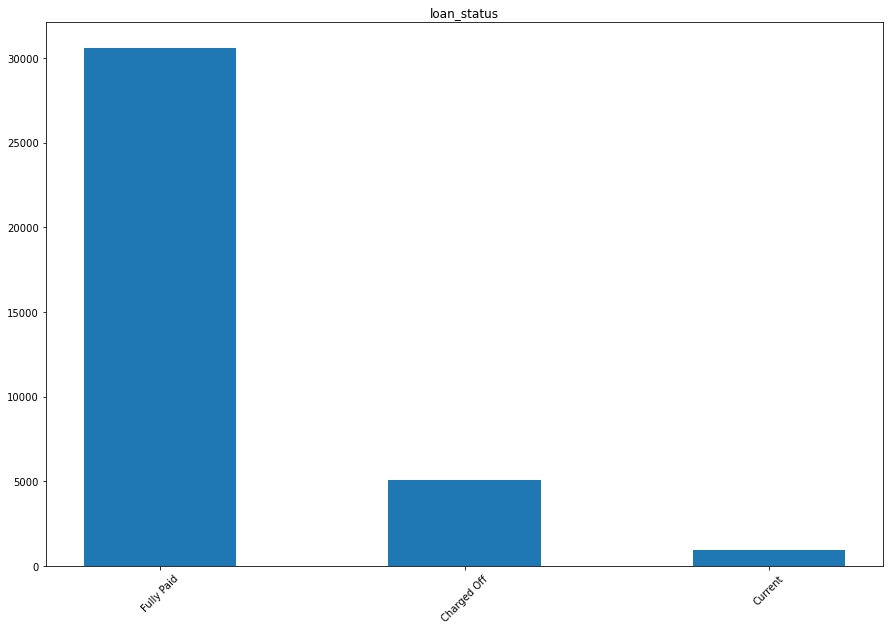

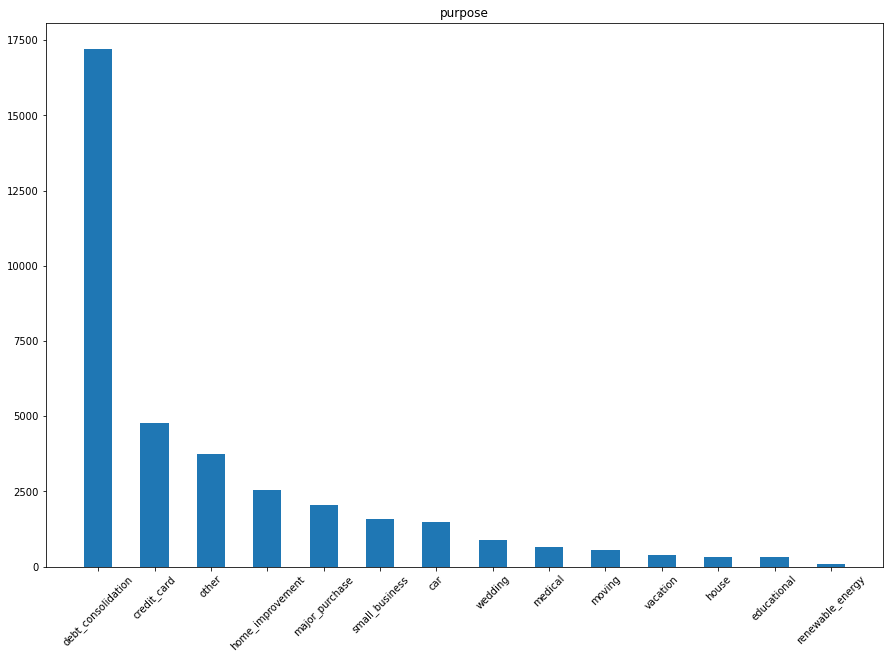

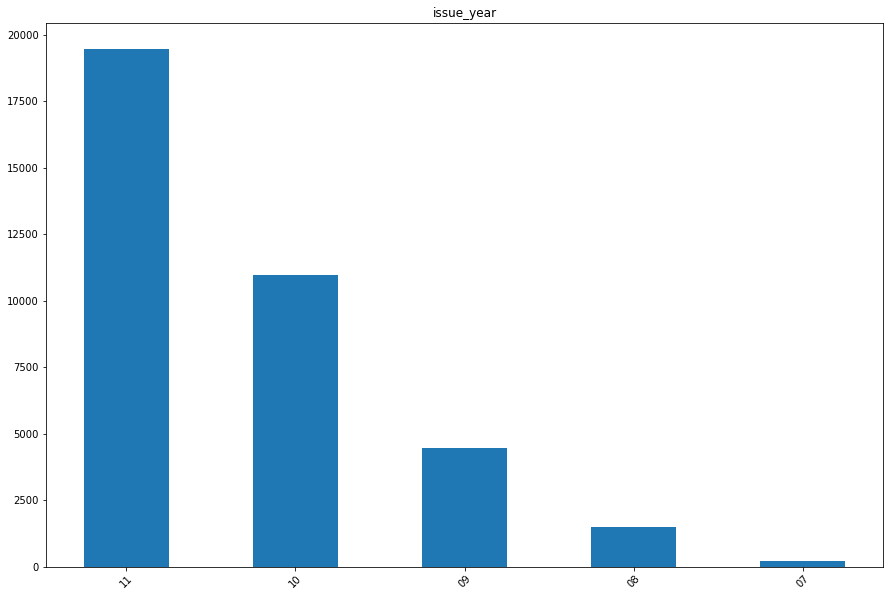

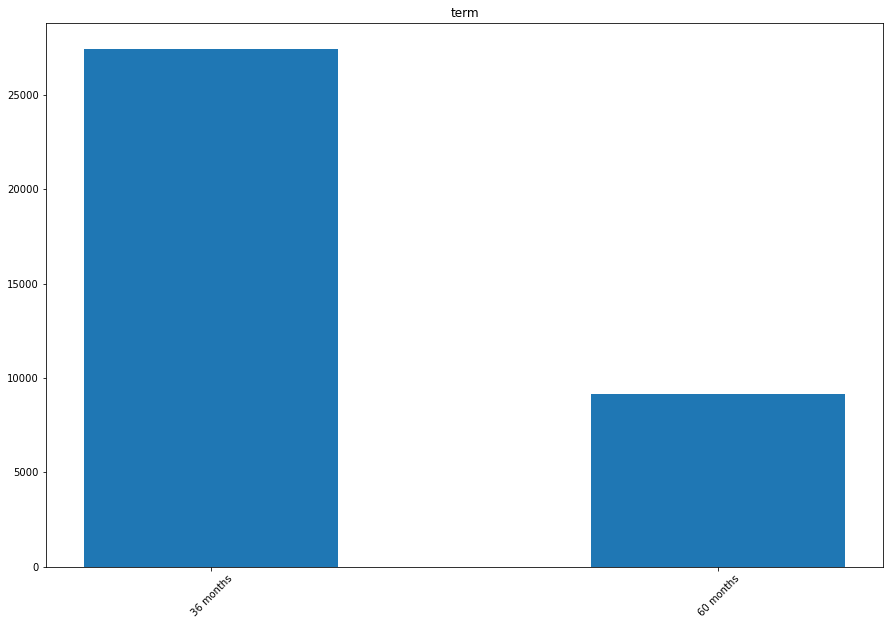

In [134]:
for col in cat_vars:
    cat = loan[col].value_counts().index
    count = loan[col].value_counts().values
    plt.figure(figsize=(15,10))
    plt.bar(cat,count,width=0.5)
    plt.xticks(rotation = 45)
    plt.title(col)
    plt.show()
    